In [1]:
#smooth or median spectra
# calculate area with propagated np.ones, then do emission area, then use variation in EW as proxy to get +- variation
# need to renormalise
#use whtew curves instead
from astropy.io import fits
import os
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
from astropy.time import Time
import pandas as pd
from lmfit import Model
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support
from sklearn.metrics import mean_squared_error
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
#Brinkworth +-0.2%
#TESS +-0.646%
#LT +- 0.81%
#PTO +-1.279%

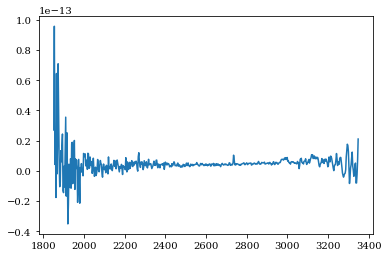

In [2]:
hdul = fits.open('C:/Users/Admin/IUE1.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, flux)
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()

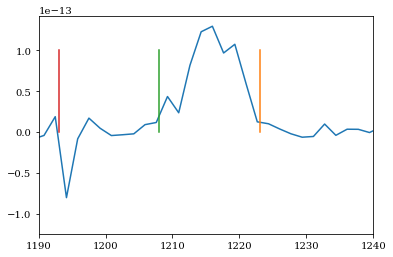

In [3]:
hdul = fits.open('C:/Users/Admin/IUE2.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, flux)
plt.xlim(1190,1240)
plt.plot([1223,1223],[0,10**-13])
plt.plot([1208,1208],[0,10**-13])
plt.plot([1193,1193],[0,10**-13])
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()

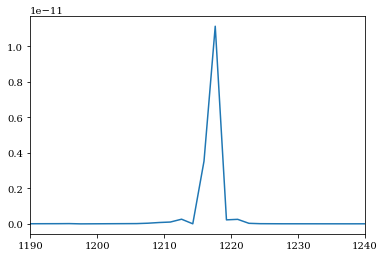

In [4]:
hdul = fits.open('C:/Users/Admin/IUE3.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, flux)
plt.xlim(1190,1240)
#plt.ylim(0,0.05*10**-11 )
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()

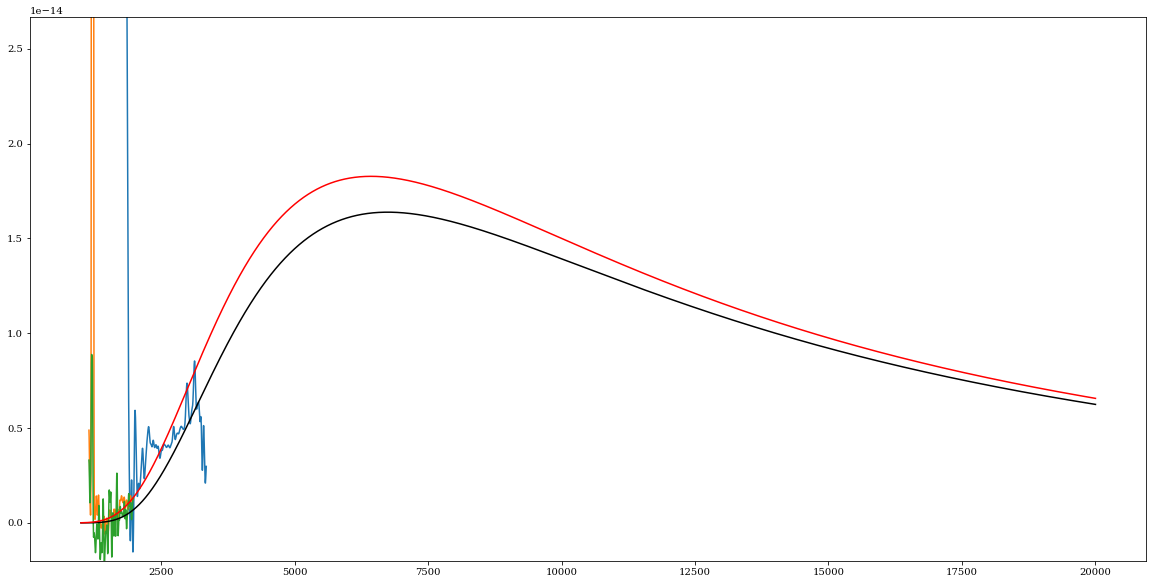

In [33]:
from scipy.ndimage import gaussian_filter
sigma  = 5
hdul = fits.open('C:/Users/Admin/IUE1.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.figure(figsize=(20,10))
plt.plot(wavelength, gaussian_filter(flux,sigma=sigma))
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()

hdul = fits.open('C:/Users/Admin/IUE3.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, gaussian_filter(flux,sigma=sigma))
###############plt.ylim(-2*10**-15,8*10**-15 )
#plt.ylim(0,0.05*10**-11 )
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()


hdul = fits.open('C:/Users/Admin/IUE4.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, gaussian_filter(flux,sigma=sigma))
plt.ylim(-2*10**-15,8*10**-14/3 )
#plt.ylim(0,0.05*10**-11 )
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()




#wavelength = np.linspace(1000,3200,100000)
wavelength = np.linspace(1000,20000,100000)
scale = 7

bb = BlackBody(temperature=7560*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux#/np.max(flux)
plt.plot(wav,fluxN/5000000000, c='k')



bb = BlackBody(temperature=7560*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux#/np.max(flux)

bb = BlackBody(temperature=10000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxS = flux#/np.max(flux)
fluxS = fluxS/10
fluxS = (fluxN*0.9)+fluxS
fluxS = fluxS#/np.max(fluxS)
plt.plot(wav,fluxS/5000000000, c='r')

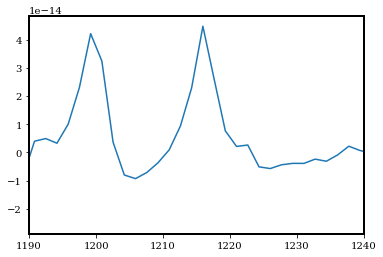

In [78]:
hdul = fits.open('C:/Users/Admin/IUE4.fits')
typeEx = hdul[1].data
wavelength = typeEx[0][0]
flux= typeEx[0][1]
plt.plot(wavelength, flux)
plt.xlim(1190,1240)
#typeEx = hdul[0]
#print(len(typeEx))
#.data
#typeEx = typeEx[1]
#typeEx = typeEx.flatten()

hdul.close()

In [4]:
0.00646*100

0.6459999999999999

In [2]:
def straightLine(xpoints,ypoints,inXpoints):
    gradient = (ypoints[1]-ypoints[0])/(xpoints[1]-xpoints[0])
    intercept = ypoints[0] - (gradient*xpoints[0])
    outYpoints = (inXpoints*gradient)+intercept
    return outYpoints
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def area_est(xpoints, ypoints, start, finish):
    
    startIdx = find_nearest(xpoints, start)
    finishIdx = find_nearest(xpoints, finish)
    xpoints = xpoints[startIdx:finishIdx]
    ypoints = ypoints[startIdx:finishIdx]
    areaEst = np.trapz(ypoints, x=xpoints)
    return areaEst
xpoints=np.linspace(0,4200,4200)
def median_average(array, N):
    result = []
    for i in range(0, int(np.shape(array)[0]/N)+1):
        tmparray = array[i*N:(i*N+N)]
        tmparray = np.median(tmparray,axis=0)
        if i == 0:
            result = tmparray
            
        else:
            result = np.vstack([result, tmparray])
            
    return result


def fCubic(x, c, q,A, B): 
    #previously f
    return c*x*x*x + q*x*x + A*x + B

def fQuart(x, d,c, q,A, B): 
    return d*x*x*x*x + c*x*x*x + q*x*x + A*x + B
def fQuad(x, c, q,A): 
    return c*x*x + q*x + A

def fFive(x, c, q,A,b,d,z): 
    return c*x*x*x*x*x + q*x*x*x*x + A*x*x*x + b*x*x + d*x+z

def fSix(x, c, q,A,b,d,z,g): 
    return c*x*x*x*x*x*x + q*x*x*x*x*x + A*x*x*x*x + b*x*x*x + d*x*x+z*x+g

def fSeven(x, c, q,A,b,d,z,g,h): 
    return c*x*x*x*x*x*x*x + q*x*x*x*x*x*x + A*x*x*x*x*x + b*x*x*x*x + d*x*x+z*x*x+g*x+h

def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def SNREst(fluxVal):
    signal = np.median(fluxVal)
    errors = []
    for el in fluxVal:
        error = np.abs(el-signal)
        errors.append(error)
    return signal/np.mean(errors)
def EWUn(N, dw, SNR, countsEm, countsCont, lenCont):
    r = (countsEm/ countsCont)
    return ((N*dw*dw)/(SNR*SNR))*(r/lenCont)*(r+lenCont)

In [3]:
fff = open("timeBM", "r")
timeBM = []
for x in fff:
    x = float(x)
    timeBM.append(x)
    
fff = open("timeRM", "r")
timeRM = []
for x in fff:
    x = float(x)
    timeRM.append(x)
    
fff = open("timeBJ", "r")
timeBJ = []
for x in fff:
    x = float(x)
    timeBJ.append(x)
    
fff = open("timeRJ", "r")
timeRJ = []
for x in fff:
    x = float(x)
    timeRJ.append(x)
    
BJXpoints = np.linspace(3625, 5460, 4200)

RJXpoints = np.linspace(5525, 7575, 4200)

countGlob = 1
holder_arrayBM = []

path = 'C:/Users/Admin/newMay19/'
consts = []
with open(path+'BTarOutDis') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        typeEx = hdul[0].data
        typeEx = typeEx[1]
        typeEx = typeEx.flatten()

        hdul.close()
        if countGlob == 1:
            
            holder_arrayBM = typeEx
        else:
            
            holder_arrayBM = np.vstack((holder_arrayBM, typeEx))
        countGlob = 2
countGlob = 1
holder_arrayBJ = []

path = 'C:/Users/Admin/newJul18/'
consts = []
with open(path+'BTarOutDis') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        typeEx = hdul[0].data
        typeEx = typeEx[1]
        typeEx = typeEx.flatten()

        hdul.close()
        if countGlob == 1:
            
            holder_arrayBJ = typeEx
        else:
            
            holder_arrayBJ = np.vstack((holder_arrayBJ, typeEx))
        countGlob = 2
        
countGlob = 1
holder_arrayRJ = []

path = 'C:/Users/Admin/newJul18/'
consts = []
with open(path+'RTarOutDis') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        typeEx = hdul[0].data
  
        typeEx = typeEx[1]
        typeEx = typeEx.flatten()

        hdul.close()
        if countGlob == 1:
            
            holder_arrayRJ = typeEx
        else:
            
            holder_arrayRJ = np.vstack((holder_arrayRJ, typeEx))
        countGlob = 2

countGlob = 1
holder_arrayRM = []

path = 'C:/Users/Admin/newMay19/'
consts = []
with open(path+'RTarOutDis') as file:
    for line in file:
        line = line.strip('\n')
        filepath = path + line
        hdul = fits.open(filepath)
        typeEx = hdul[0].data
        typeEx = typeEx[1]
        typeEx = typeEx.flatten()

        hdul.close()
        if countGlob == 1:
            
            holder_arrayRM = typeEx
        else:
            
            holder_arrayRM = np.vstack((holder_arrayRM, typeEx))
        countGlob = 2

D:\conda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\conda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


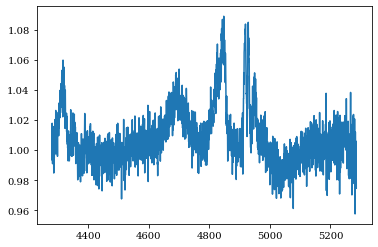

In [4]:
#individual
xpointss = BJXpoints[1500:3800]
xp1 = xpointss[0:35]
xp2 = xpointss[125:800]
xp3 = xpointss[1100:1180]
xp4 = xpointss[1330:1440]
xp5 = xpointss[1550:2400]
xpF = np.append(xp1,xp2)
xpF = np.append(xpF, xp3)
xpF = np.append(xpF, xp4)
xpF = np.append(xpF, xp5)
testMean = np.zeros(len(xpointss))
for i in range(113):
    flux = holder_arrayBJ[i]
    flux = flux[1500:3800]
    tmp1 = flux[0:35]
    tmp2 = flux[125:800]
    tmp3 = flux[1100:1180]
    tmp4 = flux[1330:1440]
    tmp5 = flux[1550:2400]
    emptiedflux = np.append(tmp1,tmp2)
    emptiedflux = np.append(emptiedflux, tmp3)
    emptiedflux = np.append(emptiedflux, tmp4)
    emptiedflux = np.append(emptiedflux, tmp5)
    popt, pcov = curve_fit(fCubic, xpF, emptiedflux)
    fluxNormed = flux/fCubic(xpointss, popt[0], popt[1], popt[2], popt[3])
    for count, el in enumerate(fluxNormed):
        if el > 1.2:
            fluxNormed[count] = np.median(fluxNormed[count-100:count+100])
    fluxNormed = fluxNormed * fCubic(xpointss, popt[0], popt[1], popt[2], popt[3])
    tmp1 = fluxNormed[0:35]
    tmp2 = fluxNormed[125:800]
    tmp3 = fluxNormed[1100:1180]
    tmp4 = fluxNormed[1330:1440]
    tmp5 = fluxNormed[1550:2400]
    emptiedflux = np.append(tmp1,tmp2)
    emptiedflux = np.append(emptiedflux, tmp3)
    emptiedflux = np.append(emptiedflux, tmp4)
    emptiedflux = np.append(emptiedflux, tmp5)
    popt, pcov = curve_fit(fCubic, xpF, emptiedflux)
    fluxNormed = fluxNormed/fCubic(xpointss, popt[0], popt[1], popt[2], popt[3])
    testMean = testMean + fluxNormed
    
testMean = testMean /113
BMean = testMean
plt.plot(BJXpoints[1500:3800], BMean)
BMeanN = BMean

In [5]:
BMean[200:800] = 1
BMean[1650:] = 1

In [6]:
xpointss = RJXpoints[800:3350]
testMean = np.zeros(len(xpointss))
xp1 = xpointss[:720]
xp2 = xpointss[1050:1225]
xp3 = xpointss[1400:1650]
xp4 = xpointss[1900:1940]
xp5 = xpointss[2400:2550]
xpF = np.append(xp1,xp2)
xpF = np.append(xpF, xp3)
xpF = np.append(xpF, xp4)
xpF = np.append(xpF, xp5)
for i in range(113):
    flux = holder_arrayRJ[i]
    if i ==11:
        flux[2725:2745] = np.median(flux[2700:2725])
    if i ==99:
        flux[1580:1600] = np.clip(flux[1580:1600],0,500)
    if i ==111:
        flux[2250:2300] = np.clip(flux[2250:2300], 0,270)
    if i == 43:
        flux[1900:2100] = np.clip(flux[1900:2100], 0,500)
    if i == 109:
        flux[1100:1200] = np.clip(flux[1100:1200],0,500)
    if i ==42:
        flux[2695:2735] = np.clip(flux[2695:2735],0, 400)
    if i == 18:
        flux[2000:3350] = np.clip(flux[2000:3350],0, 500)
    if i ==105:
        flux[2200:2220] = np.clip(flux[2200:2220], 0,350)
    flux = flux[:4100]
    flux = flux[800:3350]
    if i ==44:
        for c, el1 in enumerate(flux[1000:1150]):
            flux[1000+c] = ((1-c/150)*np.median(flux[950:1000])+(c/150)*np.median(flux[1150:1200]))
    tmp1 = flux[:720]
    tmp2 = flux[1050:1225]
    tmp3 = flux[1400:1650]
    tmp4 = flux[1900:1940]
    tmp5 = flux[2400:2550]
    emptiedflux = np.append(tmp1,tmp2)
    emptiedflux = np.append(emptiedflux, tmp3)
    emptiedflux = np.append(emptiedflux, tmp4)
    emptiedflux = np.append(emptiedflux, tmp5)
    popt, pcov = curve_fit(fQuart, xpF, uniform_filter(emptiedflux,size=20))
    fluxNormed = flux/fQuart(xpointss, popt[0], popt[1], popt[2], popt[3], popt[4])
    for count, el in enumerate(fluxNormed):
        if el > 1.15:
            fluxNormed[count] = uniform_filter(fluxNormed,size=200)[count]
        
    fluxNormed = fluxNormed * fQuart(xpointss, popt[0], popt[1], popt[2], popt[3],popt[4])
    tmp1 = flux[:720]
    tmp2 = flux[1050:1225]
    tmp3 = flux[1400:1650]
    tmp4 = flux[1900:1940]
    tmp5 = flux[2400:2550]
    emptiedflux = np.append(tmp1,tmp2)
    emptiedflux = np.append(emptiedflux, tmp3)
    emptiedflux = np.append(emptiedflux, tmp4)
    emptiedflux = np.append(emptiedflux, tmp5)
    popt, pcov = curve_fit(fQuart, xpF, uniform_filter(emptiedflux,size=20))
    fluxNormed = fluxNormed/fQuart(xpointss, popt[0], popt[1], popt[2], popt[3], popt[4])
    testMean = testMean + fluxNormed
    
RMean = testMean/113   
RMeanN = RMean

In [7]:
RMean[:760] = 1
RMean[1850:] = 1

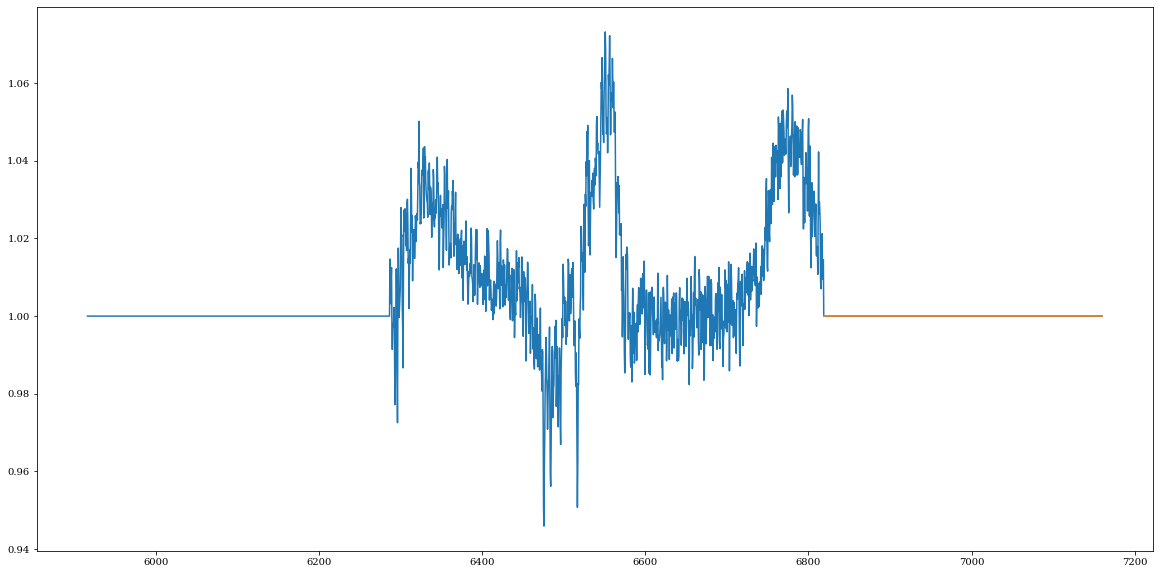

In [8]:
plt.figure(figsize=(20,10))
plt.plot(RJXpoints[800:3350], RMean)
plt.plot(RJXpoints[2650:3350], RMean[1850:])

In [9]:
print(RJXpoints[800])
print(RJXpoints[3350])

5915.569183138842
7160.508454393903


In [10]:
print(BJXpoints[1500])
print(BJXpoints[3800])

4280.513217432722
5285.633484162896


In [10]:
wavelength = np.append(np.linspace(2000,4280,5200),BJXpoints[1500:3800])
wavelength = np.append(wavelength, np.linspace(5285,5915,1000))
wavelength = np.append(wavelength,RJXpoints[800:3350])
wavelength = np.append(wavelength, np.linspace(7160,12000, 11000))
bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)

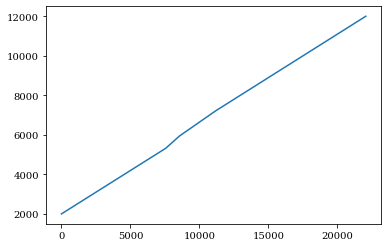

In [15]:
plt.plot(wavelength)

In [11]:
wavelength = np.linspace(1000,20000,100000)

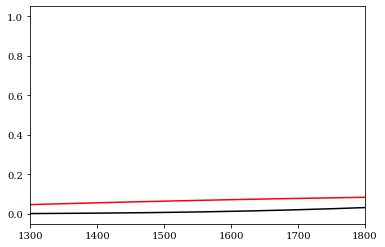

(1771, 2831)

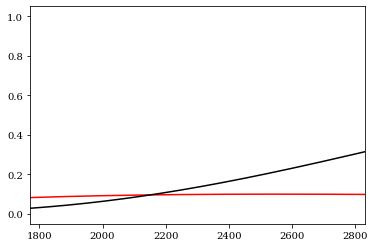

In [12]:
bb = BlackBody(temperature=20000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
plt.plot(wav,fluxN*0.1, c='r')

plt.xlim(1300,1800)

bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
plt.plot(wav,fluxN, c='k')
plt.xlim(1300,1800)
plt.show()


bb = BlackBody(temperature=20000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
plt.plot(wav,fluxN*0.1,c='r')

plt.xlim(1570,3180)

bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
plt.plot(wav,fluxN,c='k')
plt.xlim(1771,2831)

Text(0.5, 0, 'Wavelength, A')

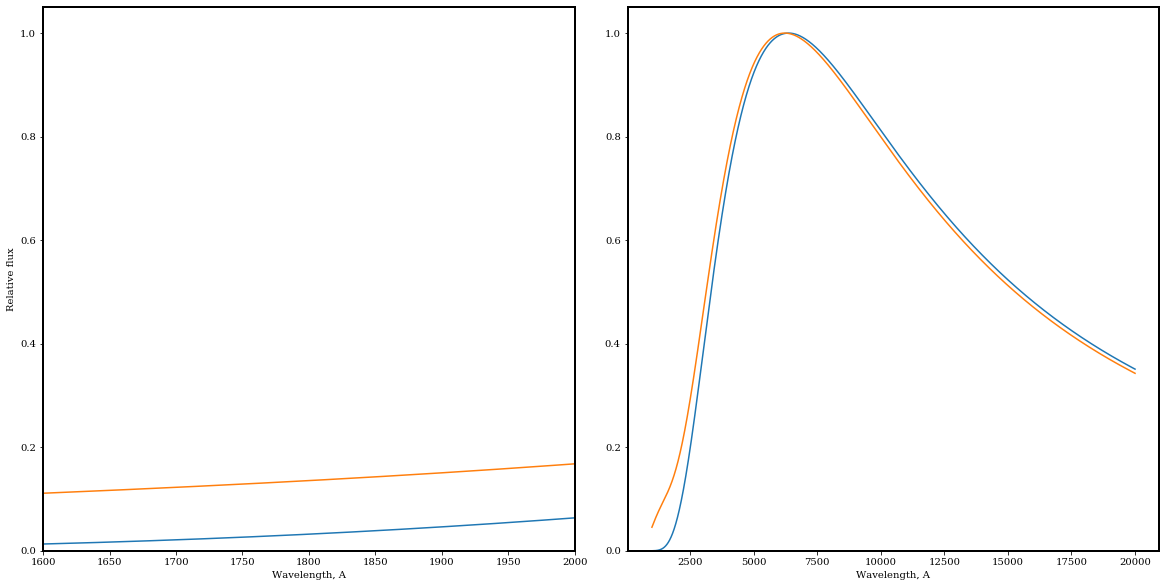

In [14]:
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 2,
                        gridspec_kw={'hspace': 0., 'wspace': 0.1}, figsize=(20,10))

bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
axs[0].plot(wav,fluxN)
bb = BlackBody(temperature=25000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxS = flux/np.max(flux)
fluxS = fluxS/10
fluxS = (fluxN*0.9)+fluxS
fluxS = fluxS/np.max(fluxS)

axs[0].plot(wav,fluxS)


bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
axs[1].plot(wav,fluxN)
bb = BlackBody(temperature=25000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxS = flux/np.max(flux)
fluxS = fluxS/10
fluxS = (fluxN*0.9)+fluxS
fluxS = fluxS/np.max(fluxS)
axs[1].plot(wav,fluxS)

axs[0].set_ylim(0,1.05)
axs[1].set_ylim(0,1.05)
axs[0].set_xlim(1600,3100)
axs[0].set_xlim(1600,2000)
axs[0].set_ylabel('Relative flux')
axs[0].set_xlabel('Wavelength, A')
axs[1].set_xlabel('Wavelength, A')

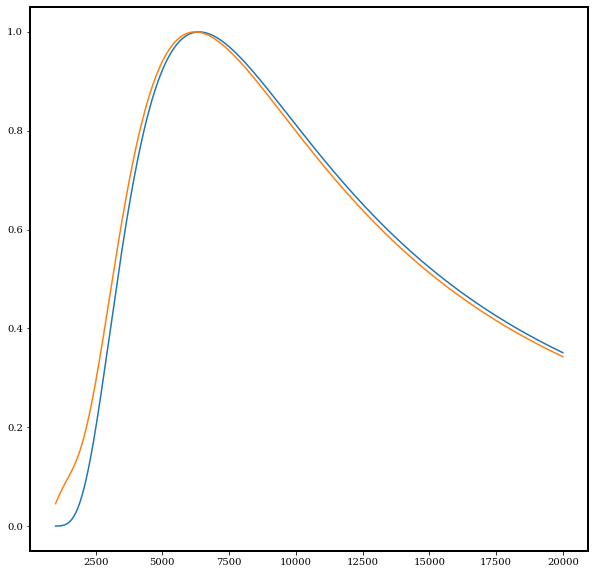

In [15]:
plt.figure(figsize=(10,10))
bb = BlackBody(temperature=8000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxN = flux/np.max(flux)
plt.plot(wav,fluxN)
bb = BlackBody(temperature=25000*u.K)
wav = wavelength * u.AA
flux = bb(wav)
fluxS = flux/np.max(flux)
fluxS = fluxS/10
fluxS = (fluxN*0.9)+fluxS
fluxS = fluxS/np.max(fluxS)
plt.plot(wav,fluxS)

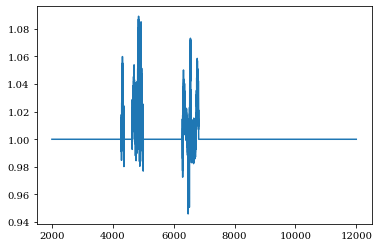

In [11]:
fluxAll = np.append(np.ones(5200),BMean)
fluxAll = np.append(fluxAll, np.ones(1000))
fluxAll = np.append(fluxAll,RMean)
fluxAll = np.append(fluxAll, np.ones(11000))
plt.plot(wav,fluxAll)

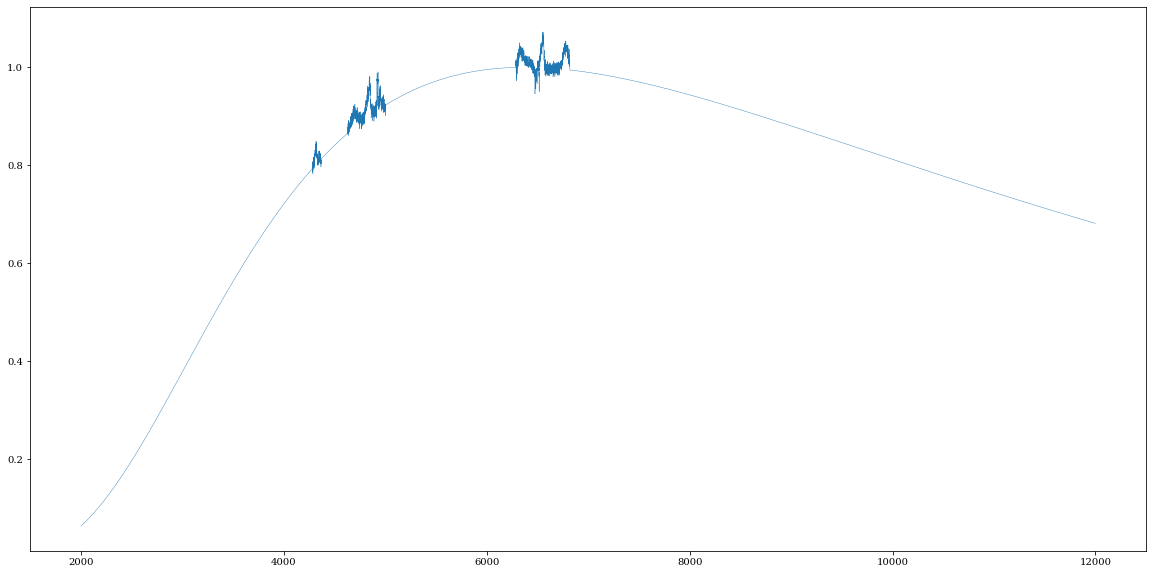

In [12]:
plt.figure(figsize=(20,10))
plt.plot(wav, fluxN*fluxAll,linewidth=0.4)
#plt.savefig('GD356BlackBody8000.pdf')
from astropy.io import ascii

#ascii.write([wav, fluxN*fluxAll], 'GD356BlackBody8000.dat', names=['wavelength', 'relativeFlux'], overwrite=True)

In [13]:
# estimate BB area above, estimate area above, emission = area dif
# see how it varies in other filters 

In [14]:
# LT
# TESS
# V

In [18]:
dataLT = pd.read_csv('LTVR.csv', delimiter=',')
waveLT = dataLT['wave']*10
sensLT = dataLT[' sens']/100

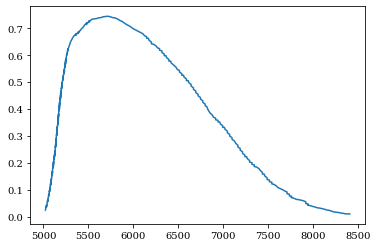

In [19]:
plt.plot(waveLT,sensLT)

In [15]:
np.sum(waveLT[104])

5979.803680732879

In [16]:
waveLT

0      5021.922738
1      5035.163269
2      5032.905491
3      5048.409688
4      5046.151910
          ...     
246    8313.266372
247    8339.397141
248    8365.519079
249    8391.658680
250    8411.263380
Name: wave, Length: 251, dtype: float64

In [20]:
wavLT = wav[6897:13894]

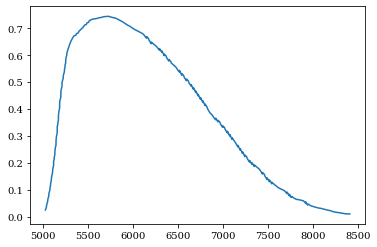

In [21]:
from scipy.interpolate import interp1d
f2 = interp1d(waveLT, sensLT)
plt.plot(wavLT, f2(wavLT))

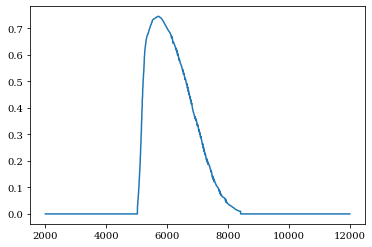

In [22]:
sensLT = np.append(np.zeros(6896),f2(wavLT))
sensLT = np.append(sensLT,np.zeros(22050-13893))
plt.plot(wav, sensLT)

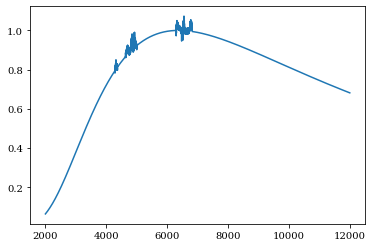

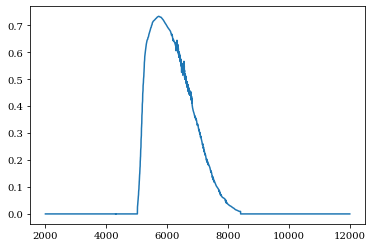

In [23]:
plt.plot(wav, fluxN*fluxAll)
plt.show()
plt.plot(wav, fluxN*fluxAll*sensLT)

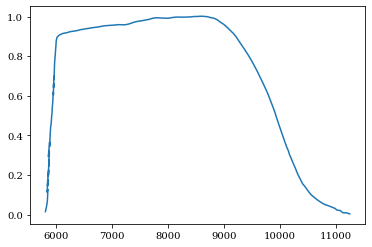

In [24]:
dataTESS = pd.read_csv('TessBand.csv', delimiter=',')
waveTESS = dataTESS['wave']*10
sensTESS = dataTESS['sens']
plt.plot(waveTESS,sensTESS)

In [22]:
waveTESS

0       5806.644686
1       5827.383404
2       5841.153145
3       5847.126018
4       5851.611649
           ...     
154    11020.217665
155    11079.664526
156    11127.958690
157    11191.047637
158    11249.523436
Name: wave, Length: 159, dtype: float64

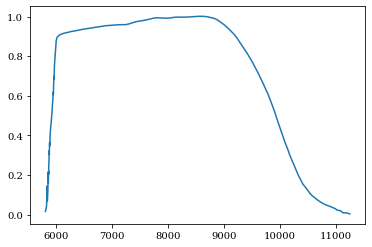

In [25]:
f2 = interp1d(waveTESS, sensTESS)
wavTESS = wav[8328:20344]
plt.plot(wavTESS, f2(wavTESS))

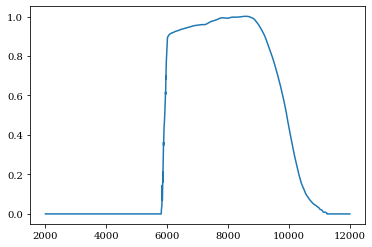

In [26]:
sensTessFinal = np.append(np.zeros(8327), f2(wavTESS))
sensTessFinal = np.append(sensTessFinal, np.zeros(22050-20343))
plt.plot(wav, sensTessFinal)

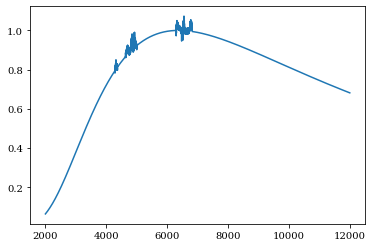

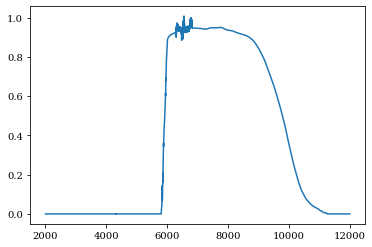

In [27]:
plt.plot(wav, fluxN*fluxAll)
plt.show()
plt.plot(wav, fluxN*fluxAll*sensTessFinal)

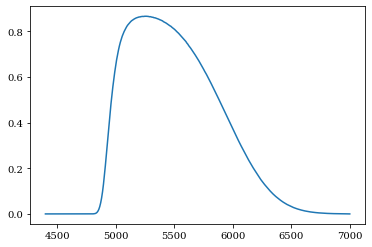

In [28]:
dataBr = pd.read_csv('Brinkworth.csv', delimiter=',')
waveBr = dataBr['wave']*10
sensBr = dataBr['sens']
plt.plot(waveBr,sensBr)

In [27]:
np.sum(waveBr[133])

5464.0

In [28]:
waveBr

0      4400.0
1      4408.0
2      4416.0
3      4424.0
4      4432.0
        ...  
321    6968.0
322    6976.0
323    6984.0
324    6992.0
325    7000.0
Name: wave, Length: 326, dtype: float64

In [29]:
wav[10721]

<Quantity 6999.88687783 Angstrom>

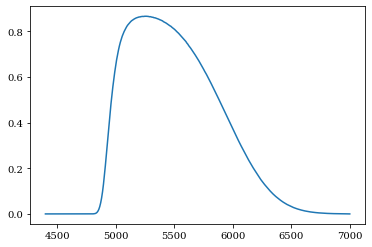

In [29]:
f2 = interp1d(waveBr, sensBr)
wavBr = wav[5474:10722]
plt.plot(waveBr, f2(waveBr))

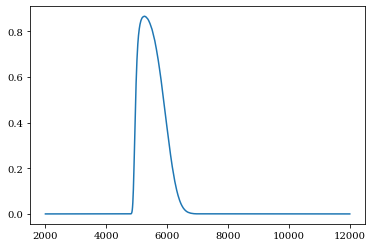

In [30]:
sensBrFinal = np.append(np.zeros(5473), f2(wavBr))
sensBrFinal = np.append(sensBrFinal, np.zeros(22050-10721))
plt.plot(wav, sensBrFinal)

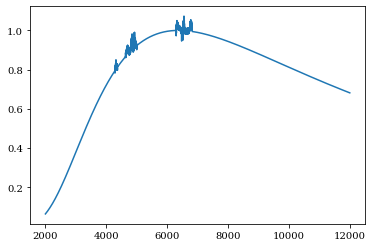

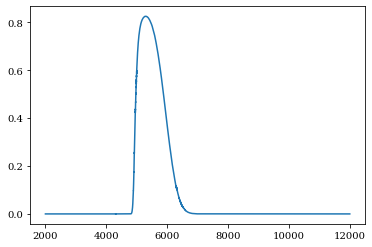

In [31]:
plt.plot(wav, fluxN*fluxAll)
plt.show()
plt.plot(wav, fluxN*fluxAll*sensBrFinal)

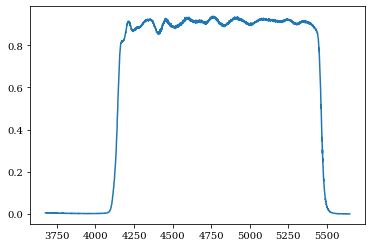

In [32]:
dataZTF = pd.read_csv('Palomar_ZTF.g.dat', delimiter=" ")
waveZTF = dataZTF['wave']
sensZTF = dataZTF['sens']
plt.plot(waveZTF,sensZTF)


In [36]:
waveZTF

0       3676.0
1       3677.0
2       3678.0
3       3679.0
4       3680.0
         ...  
2588    5646.0
2589    5646.0
2590    5647.0
2591    5648.0
2592    5648.0
Name: wave, Length: 2593, dtype: float64

In [37]:
wav[8076]

<Quantity 5648.24324324 Angstrom>

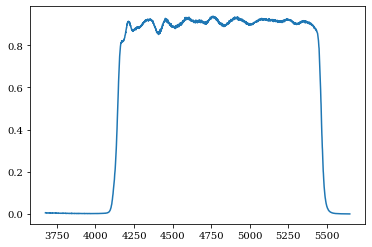

In [33]:
f2 = interp1d(waveZTF, sensZTF)
wavZTF = wav[3822:8076]
plt.plot(waveZTF, f2(waveZTF))

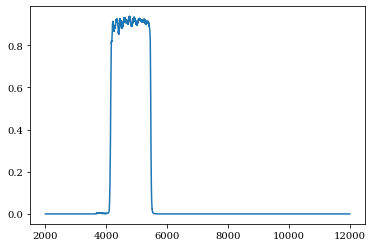

In [34]:
sensZTFFinal = np.append(np.zeros(3821), f2(wavZTF))
sensZTFFinal = np.append(sensZTFFinal, np.zeros(22050-8075))
plt.plot(wav, sensZTFFinal)

In [40]:
2637.4000350606307/2

1318.7000175303153

In [41]:
np.sum(sensZTFFinal[:6341])
wav[6341]

<Quantity 4779.14027149 Angstrom>

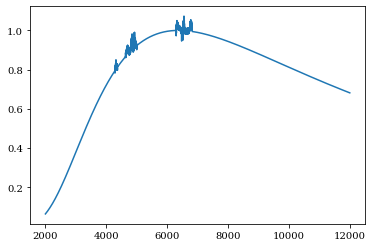

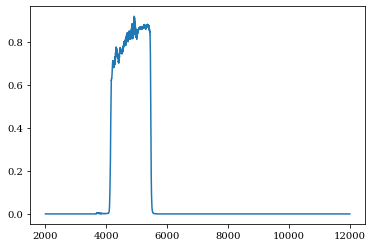

In [35]:
plt.plot(wav, fluxN*fluxAll)
plt.show()
plt.plot(wav, fluxN*fluxAll*sensZTFFinal)

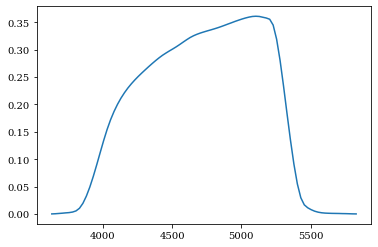

In [36]:
dataPTO = pd.read_csv('SLOAN_SDSS.g.dat', delimiter=" ")
wavePTO = dataPTO['wave']
sensPTO = dataPTO['sens']
plt.plot(wavePTO,sensPTO)


In [44]:
wavePTO

0     3630.0
1     3655.0
2     3680.0
3     3705.0
4     3730.0
       ...  
84    5730.0
85    5755.0
86    5780.0
87    5805.0
88    5830.0
Name: wave, Length: 89, dtype: float64

In [45]:
wav[8364]

<Quantity 5829.86486486 Angstrom>

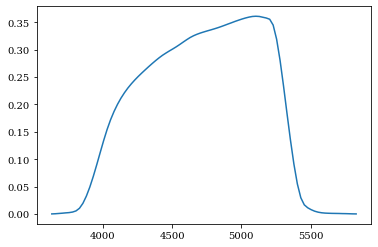

In [37]:
f2 = interp1d(wavePTO, sensPTO)
wavPTO = wav[3717:8365]
plt.plot(wavePTO, f2(wavePTO))

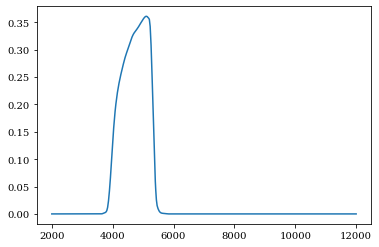

In [38]:
sensPTOFinal = np.append(np.zeros(3716), f2(wavPTO))
sensPTOFinal = np.append(sensPTOFinal, np.zeros(22050-8364))
plt.plot(wav, sensPTOFinal)

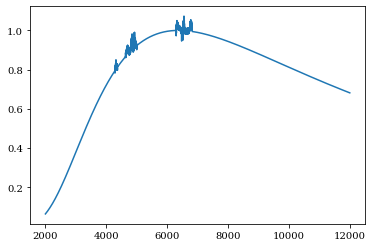

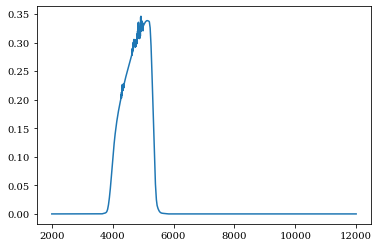

In [39]:
plt.plot(wav, fluxN*fluxAll)
plt.show()
plt.plot(wav, fluxN*fluxAll*sensPTOFinal)

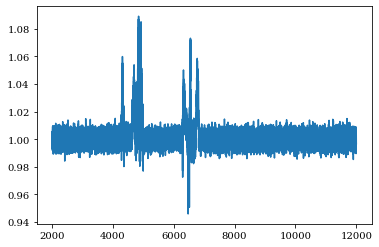

In [41]:
mu, sigma = 1, (1/23)/np.sqrt(113)
BMeanN[200:800] = np.random.normal(mu, sigma, len(BMeanN[200:800]))
BMeanN[1650:] = np.random.normal(mu, sigma, len(BMeanN[1650:]))
RMeanN[:760] = np.random.normal(mu, sigma, len(RMeanN[:760]))
RMeanN[1850:] = np.random.normal(mu, sigma, len(RMeanN[1850:]))

fluxAlln = np.append(np.random.normal(mu, sigma, 5200),BMeanN)
fluxAlln = np.append(fluxAlln, np.random.normal(mu, sigma, 1000))
fluxAlln = np.append(fluxAlln,RMean)
fluxAlln = np.append(fluxAlln, np.random.normal(mu, sigma, 11000))
plt.plot(wav,fluxAlln)


Text(0, 0.5, 'Relative Flux')

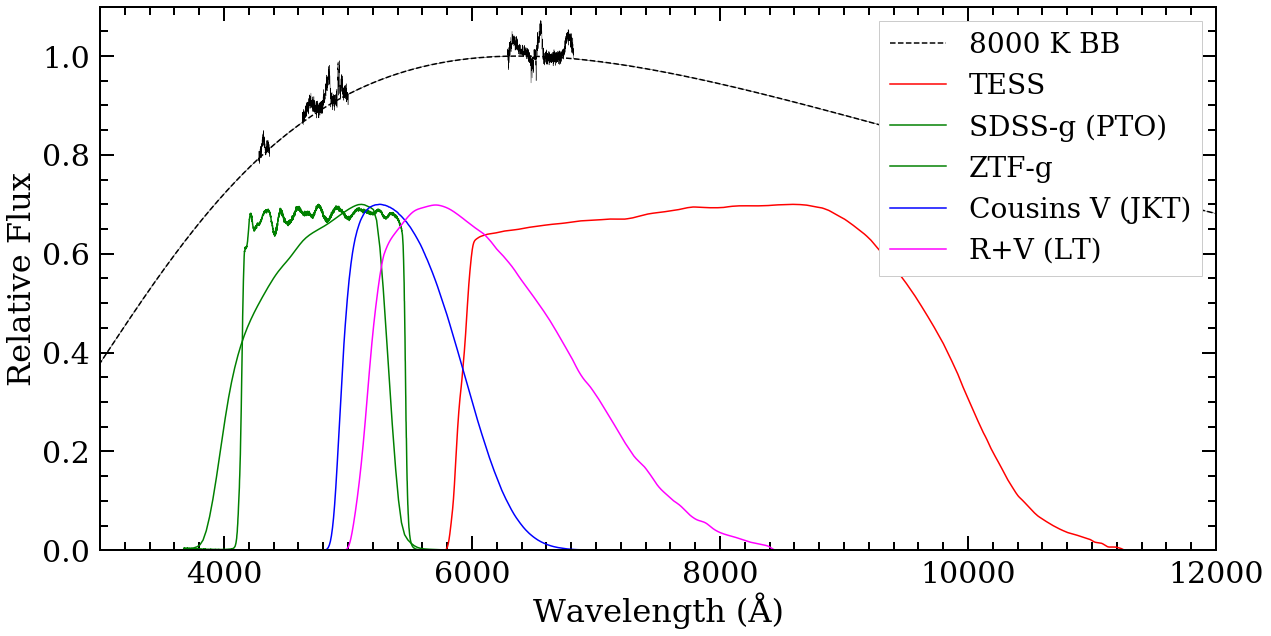

In [50]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
axs.plot(wav, fluxN*fluxAll,linewidth=0.4, c='k')
axs.plot(wav, fluxN,linewidth=1.5, c='k', linestyle='dashed', label='8000 K BB')
#9pto)
axs.plot(wav, 0.7*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')
axs.plot(wav, 0.7*sensPTOFinal/max(sensPTOFinal), label='SDSS-g (PTO)',c='g')
axs.plot(wav, 0.7*sensZTFFinal/max(sensZTFFinal), label='ZTF-g',c='g')
axs.plot(wav, 0.7*sensBrFinal/max(sensBrFinal), label='Cousins V (JKT)', c='b')
axs.plot(wav, 0.7*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='R+V (LT)', c='magenta')
axs.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
axs.set_ylim(0,1.1)
axs.set_xlim(3000,12000)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Relative Flux", fontsize=32)
#plt.savefig('GD356BlackBody8000.pdf')

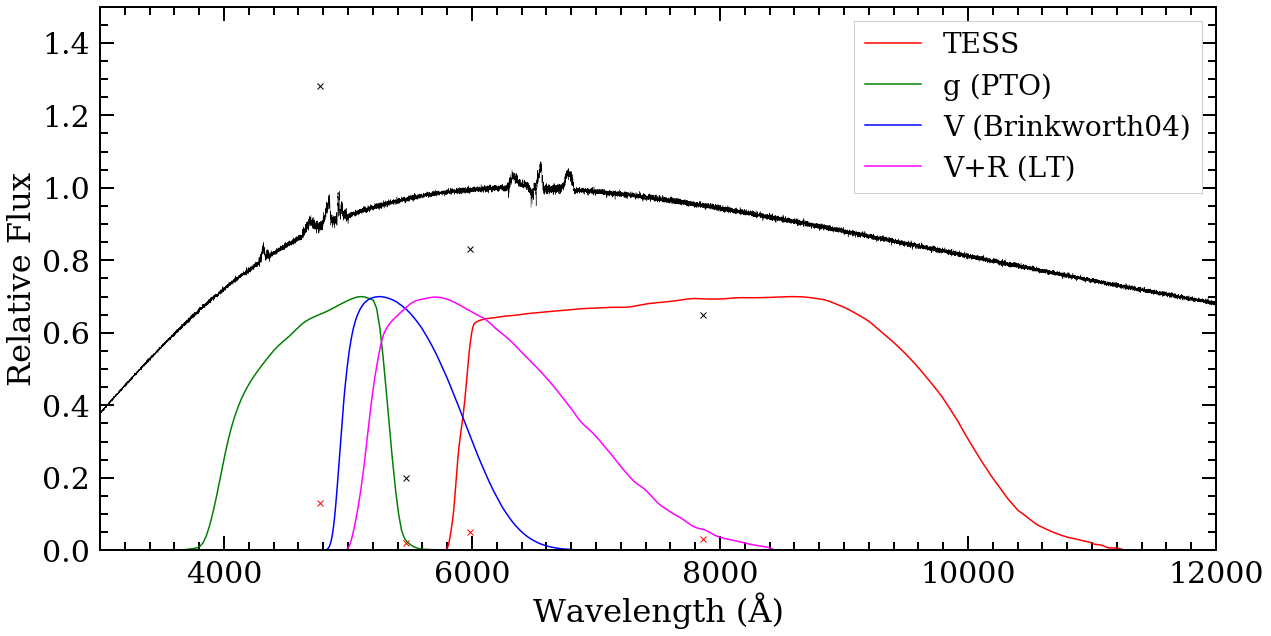

In [45]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
axs.plot(wav, 0.7*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')
axs.plot(wav, 0.7*sensPTOFinal/max(sensPTOFinal), label='g (PTO)',c='g')
axs.plot(wav, 0.7*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='b')
axs.plot(wav, 0.7*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='magenta')
axs.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
axs.set_ylim(0,1.5)
axs.set_xlim(3000,12000)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Relative Flux", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')

axs.plot([4770,5464.0, 5980,7865],[1.28, 0.2, 0.83,0.65],'kx')
axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')
#plt.savefig('GD356BlackBody8000N.pdf')

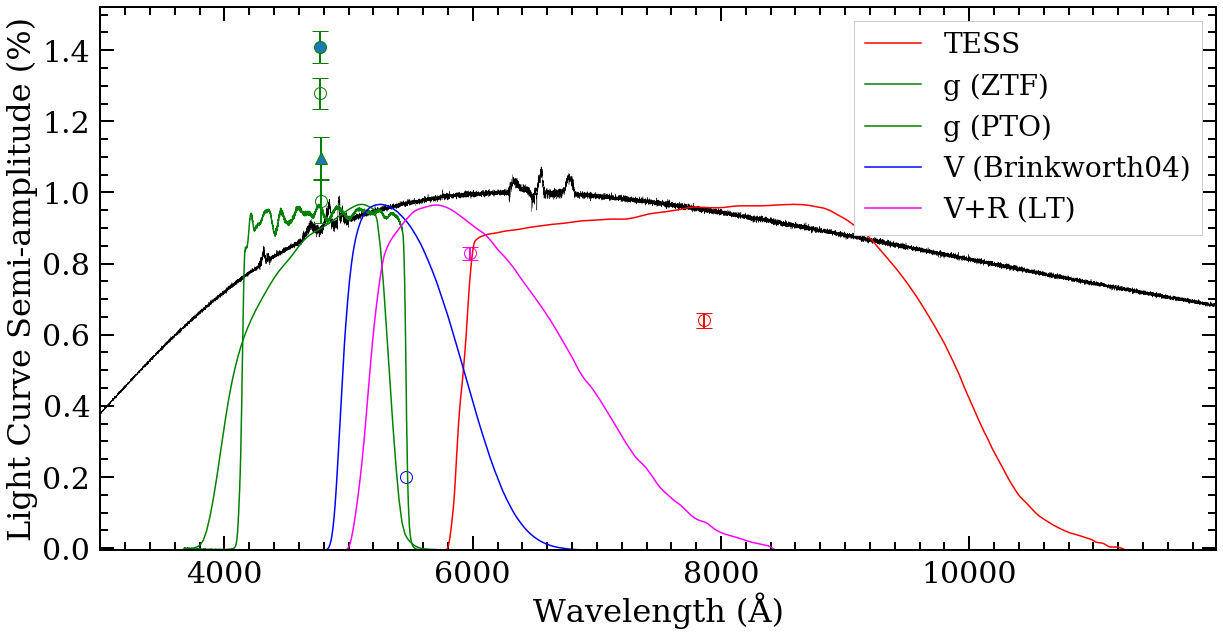

In [53]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
from matplotlib import transforms
#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
ax2 = axs.twinx()
axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
ax2.plot(wav, 0.7*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')
ax2.plot(wav, 0.7*sensZTFFinal/max(sensZTFFinal), label='g (ZTF)',c='g')
ax2.plot(wav, 0.7*sensPTOFinal/max(sensPTOFinal), label='g (PTO)',c='g')
ax2.plot(wav, 0.7*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='b')
ax2.plot(wav, 0.7*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='magenta')
ax2.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
ax2.set_ylim(0,1.1)
axs.set_xlim(3000,11990)
ax2.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')
ax2.tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')

axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt='o', fillstyle='none', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)
#0.00829031622
axs.errorbar([4770],[1.2787+(0.6850553051494778*0.19)],yerr=0.04423435472098118, fmt='o', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)

axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt='o', fillstyle='none', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.plot([5464],[0.2], marker='o', fillstyle='none', c='b',ms=12)
axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='o', fillstyle='none', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)
axs.errorbar([4779],[0.97524528+(0.6403078140184747*0.19)], yerr=100*0.00060, fmt='^', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt='o', fillstyle='none', ecolor='r',  mec='r',ms=12, capsize=8,elinewidth=2)
bboxx = transforms.Bbox([[1.18, 0.12], [18.08, 8.9]])
#plt.savefig('FiltersHST.pdf',bbox_inches=bboxx)



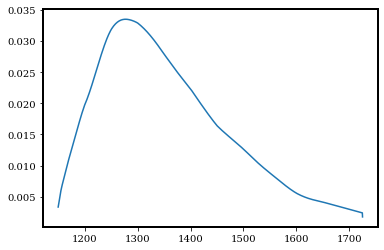

In [42]:
dataFUV = pd.read_csv('HST_STIS_FUV.25MAMA_G140L.dat', delimiter=" ")
waveFUV = dataFUV['wave']
sensFUV = dataFUV['sens']
plt.plot(waveFUV,sensFUV)


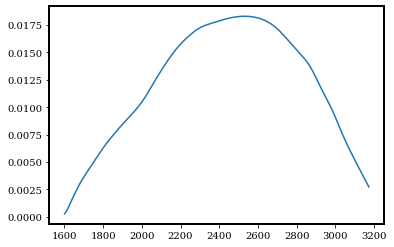

In [43]:
dataNUV = pd.read_csv('HST_STIS_NUV.25MAMA_G230L.dat', delimiter=" ")
waveNUV = dataNUV['wave']
sensNUV = dataNUV['sens']
plt.plot(waveNUV,sensNUV)


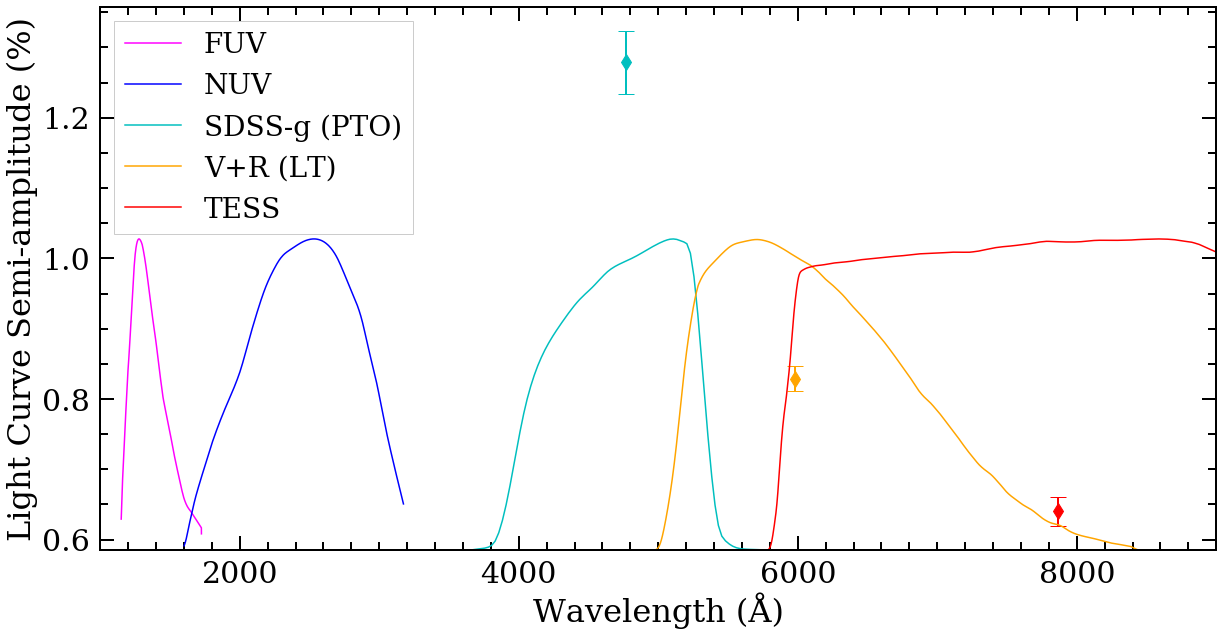

In [44]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
from matplotlib import transforms





#bb2 = BlackBody(temperature=15000*u.K)
#wav2 = wavelength * u.AA
#flux2 = bb2(wav2)
#fluxN2 = flux2/np.max(flux2)








#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
ax2 = axs.twinx()
###########axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
#axs.plot(wav2, fluxN2*1.3, c='r')
#ax2.plot(wav, 0.63*gaussian_filter(sensZTFFinal,sigma=50)/max(sensZTFFinal), label='ZTF-g',c='magenta')
ax2.plot(waveFUV, 0.63*sensFUV/max(sensFUV), label='FUV',c='magenta')
ax2.plot(waveNUV, 0.63*sensNUV/max(sensNUV), label='NUV',c='b')
ax2.plot(wav, 0.63*sensPTOFinal/max(sensPTOFinal), label='SDSS-g (PTO)',c='c')
#ax2.plot(wav, 0.63*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='g')
ax2.plot(wav, 0.63*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='orange')
ax2.plot(wav, 0.63*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')
#ax2.plot(wav, sensZTFFinal, label='ZTF-g',c='magenta')
#ax2.plot(wav, gaussian_filter(sensTessFinal,sigma=20), label='TESS', c='r')
#ax2.plot(wav, sensPTOFinal, label='SDSS-g (PTO)',c='b')
#ax2.plot(wav, sensBrFinal, label='V (Brinkworth04)', c='g')
#ax2.plot(wav, gaussian_filter(sensLT,sigma=50), label='V+R (LT)', c='orange')


axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
ax2.set_ylim(0,1.1)
axs.set_xlim(1000,9000)
ax2.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')
ax2.tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')

axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt='d', c='c', ecolor='c',  mec='c',ms=12, capsize=8,elinewidth=2)
#0.00829031622

axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt='d', c='orange', ecolor='orange',  mec='orange',ms=12, capsize=8,elinewidth=2)
#axs.plot([5464],[0.2], marker='d', c='g',ms=12)
#axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='d', c='magenta', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt='d', c='r', ecolor='r',  mec='r',ms=12, capsize=8,elinewidth=2)
bboxx = transforms.Bbox([[1.18, 0.12], [18.08, 8.9]])
#
ax2.legend(prop={'size': 28}, loc='upper left',fancybox=False, framealpha=1)
#plt.savefig('FiltersHST5.pdf',bbox_inches=bboxx)

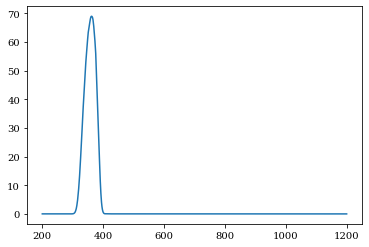

In [40]:
dataSDSSu = pd.read_csv('Sloan_u.txt', delimiter=",")
waveSDSSu = dataSDSSu['wave']
sensSDSSu = dataSDSSu['sens']
plt.plot(waveSDSSu,sensSDSSu)

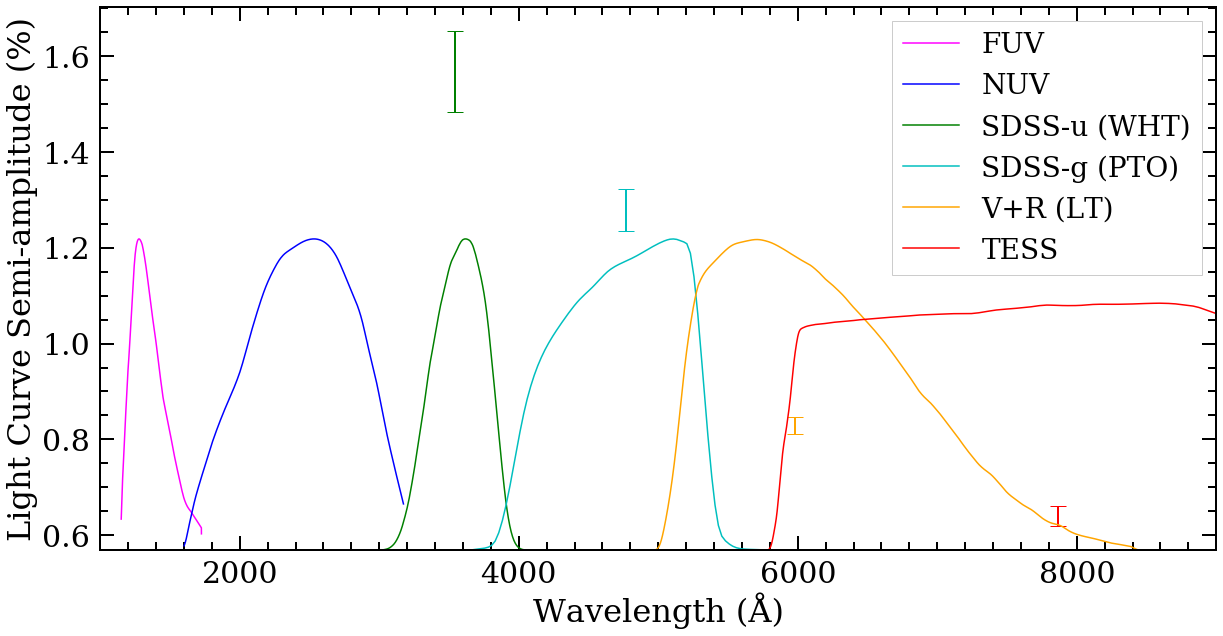

In [44]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
from matplotlib import transforms





#bb2 = BlackBody(temperature=15000*u.K)
#wav2 = wavelength * u.AA
#flux2 = bb2(wav2)
#fluxN2 = flux2/np.max(flux2)








#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
ax2 = axs.twinx()
###########axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
#axs.plot(wav2, fluxN2*1.3, c='r')
#ax2.plot(wav, 0.63*gaussian_filter(sensZTFFinal,sigma=50)/max(sensZTFFinal), label='ZTF-g',c='magenta')
ax2.plot(waveFUV, 0.63*sensFUV/max(sensFUV), label='FUV',c='magenta')
ax2.plot(waveNUV, 0.63*sensNUV/max(sensNUV), label='NUV',c='b')
ax2.plot(waveSDSSu*10, 0.63*sensSDSSu/max(sensSDSSu), label='SDSS-u (WHT)', c='g')
ax2.plot(wav, 0.63*sensPTOFinal/max(sensPTOFinal), label='SDSS-g (PTO)',c='c')
#ax2.plot(wav, 0.63*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='g')
ax2.plot(wav, 0.63*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='orange')
ax2.plot(wav, 0.5*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')

#ax2.plot(wav, sensZTFFinal, label='ZTF-g',c='magenta')
#ax2.plot(wav, gaussian_filter(sensTessFinal,sigma=20), label='TESS', c='r')
#ax2.plot(wav, sensPTOFinal, label='SDSS-g (PTO)',c='b')
#ax2.plot(wav, sensBrFinal, label='V (Brinkworth04)', c='g')
#ax2.plot(wav, gaussian_filter(sensLT,sigma=50), label='V+R (LT)', c='orange')


axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
ax2.set_ylim(0,1.1)
#axs.set_ylim(0.6,2.1)
axs.set_xlim(1000,9000)
ax2.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')
ax2.tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')

axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt=',', c='c', ecolor='c',  mec='c',ms=12, capsize=8,elinewidth=2)
#0.00829031622
axs.errorbar([3543],[1.5673],yerr=0.0846, fmt=',', c='g', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)

axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt=',', c='orange', ecolor='orange',  mec='orange',ms=12, capsize=8,elinewidth=2)
#axs.plot([5464],[0.2], marker='d', c='g',ms=12)
#axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='d', c='magenta', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt=',', c='r', ecolor='r',  mec='r',ms=12, capsize=8,elinewidth=2)
bboxx = transforms.Bbox([[1.18, 0.12], [18.08, 8.9]])
#
ax2.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
#plt.savefig('FiltersWHTUp.pdf',bbox_inches=bboxx)

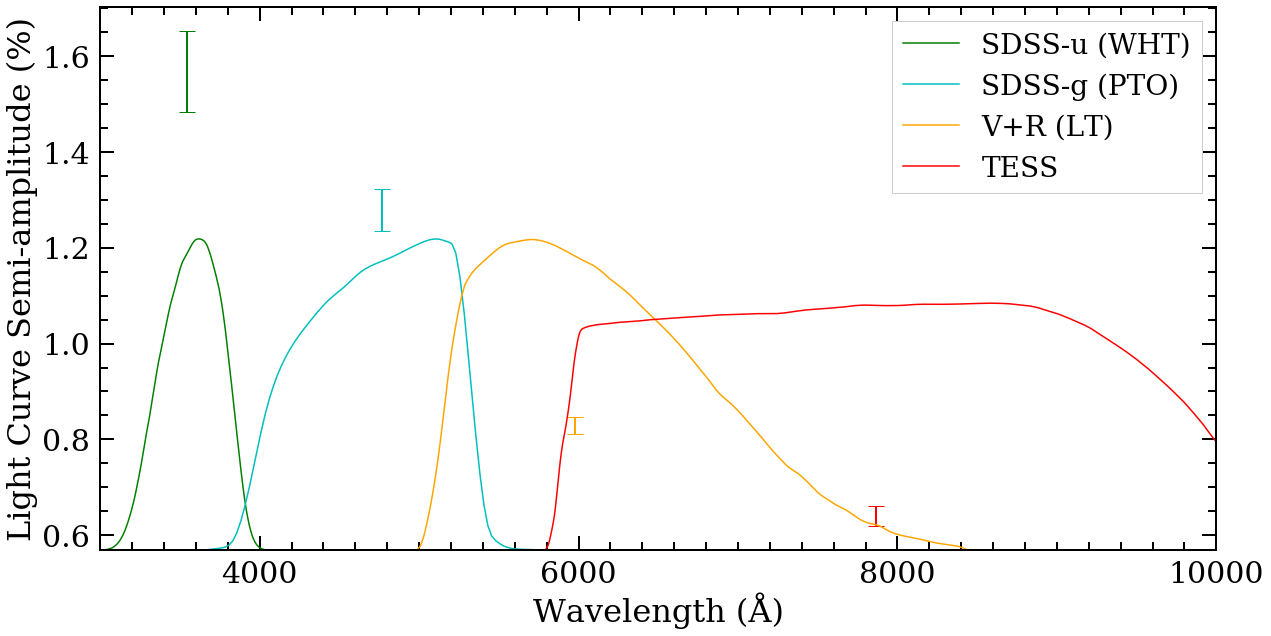

In [46]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
from matplotlib import transforms





#bb2 = BlackBody(temperature=15000*u.K)
#wav2 = wavelength * u.AA
#flux2 = bb2(wav2)
#fluxN2 = flux2/np.max(flux2)








#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
ax2 = axs.twinx()
###########axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
#axs.plot(wav2, fluxN2*1.3, c='r')
#ax2.plot(wav, 0.63*gaussian_filter(sensZTFFinal,sigma=50)/max(sensZTFFinal), label='ZTF-g',c='magenta')
#ax2.plot(waveFUV, 0.63*sensFUV/max(sensFUV), label='FUV',c='magenta')
#ax2.plot(waveNUV, 0.63*sensNUV/max(sensNUV), label='NUV',c='b')
ax2.plot(waveSDSSu*10, 0.63*sensSDSSu/max(sensSDSSu), label='SDSS-u (WHT)', c='g')
ax2.plot(wav, 0.63*sensPTOFinal/max(sensPTOFinal), label='SDSS-g (PTO)',c='c')
#ax2.plot(wav, 0.63*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='g')
ax2.plot(wav, 0.63*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='orange')
ax2.plot(wav, 0.5*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')

#ax2.plot(wav, sensZTFFinal, label='ZTF-g',c='magenta')
#ax2.plot(wav, gaussian_filter(sensTessFinal,sigma=20), label='TESS', c='r')
#ax2.plot(wav, sensPTOFinal, label='SDSS-g (PTO)',c='b')
#ax2.plot(wav, sensBrFinal, label='V (Brinkworth04)', c='g')
#ax2.plot(wav, gaussian_filter(sensLT,sigma=50), label='V+R (LT)', c='orange')


axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
ax2.set_ylim(0,1.1)
#axs.set_ylim(0.6,2.1)
axs.set_xlim(3000,10000)
ax2.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')
ax2.tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')

axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt=',', c='c', ecolor='c',  mec='c',ms=12, capsize=8,elinewidth=2)
#0.00829031622
axs.errorbar([3543],[1.5673],yerr=0.0846, fmt=',', c='g', ecolor='g',  mec='g',ms=12, capsize=8,elinewidth=2)

axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt=',', c='orange', ecolor='orange',  mec='orange',ms=12, capsize=8,elinewidth=2)
#axs.plot([5464],[0.2], marker='d', c='g',ms=12)
#axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='d', c='magenta', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt=',', c='r', ecolor='r',  mec='r',ms=12, capsize=8,elinewidth=2)
bboxx = transforms.Bbox([[1.18, 0.12], [18.08, 8.9]])
#
ax2.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
#plt.savefig('FiltersWHTUp.pdf',bbox_inches=bboxx)

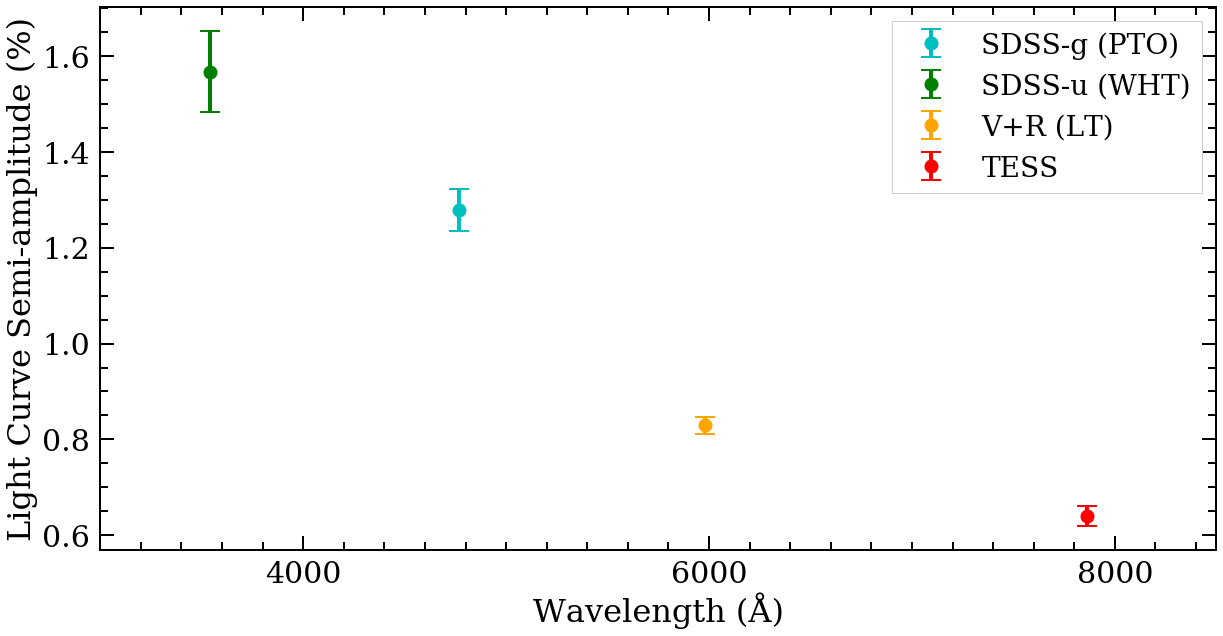

In [27]:
from scipy.ndimage import gaussian_filter
rc('axes', linewidth=2)
fig, axs = plt.subplots(1, 1,figsize=(20,10))
from matplotlib import transforms





#bb2 = BlackBody(temperature=15000*u.K)
#wav2 = wavelength * u.AA
#flux2 = bb2(wav2)
#fluxN2 = flux2/np.max(flux2)








#axs.plot(wav, fluxN,linewidth=1, c='k', linestyle='--', label='8000 K BB')
#9pto)
ax2 = axs.twinx()
###########axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k')
#axs.plot(wav2, fluxN2*1.3, c='r')
#ax2.plot(wav, 0.63*gaussian_filter(sensZTFFinal,sigma=50)/max(sensZTFFinal), label='ZTF-g',c='magenta')
#ax2.plot(waveFUV, 0.63*sensFUV/max(sensFUV), label='FUV',c='magenta')
#ax2.plot(waveNUV, 0.63*sensNUV/max(sensNUV), label='NUV',c='b')
#ax2.plot(wav, sensZTFFinal, label='ZTF-g',c='magenta')
#ax2.plot(wav, gaussian_filter(sensTessFinal,sigma=20), label='TESS', c='r')
#ax2.plot(wav, sensPTOFinal, label='SDSS-g (PTO)',c='b')
#ax2.plot(wav, sensBrFinal, label='V (Brinkworth04)', c='g')
#ax2.plot(wav, gaussian_filter(sensLT,sigma=50), label='V+R (LT)', c='orange')


axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
axs.yaxis.set_major_locator(MultipleLocator(0.2))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.05))
axs.xaxis.set_minor_locator(MultipleLocator(200))
axs.tick_params(axis='x',which='minor', length=8)
axs.tick_params(axis='y',which='minor', length=8,direction='in')
ax2.set_ylim(0,1.1)
#axs.set_ylim(0.,)
axs.set_xlim(3000,8500)
ax2.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=32)
#axs.plot([4770,5464.0, 5980,7865],[1000*1.28/2200, 1000*0.2/2200, 1000*0.83/3390,1000*0.65/5443],'kx')
ax2.tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')

axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt=',', c='c', ecolor='c',  mec='c',ms=12, capsize=10,elinewidth=4, label='SDSS-g (PTO)',marker='o',markeredgewidth=2)
#0.00829031622
axs.errorbar([3543],[1.5673],yerr=0.0846, fmt=',', c='g', ecolor='g',  mec='g',ms=12, capsize=10,elinewidth=4,label='SDSS-u (WHT)',marker='o',markeredgewidth=2)

axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt=',', c='orange', ecolor='orange',  mec='orange',ms=12, capsize=10,elinewidth=4,label='V+R (LT)',marker='o',markeredgewidth=2)
#axs.plot([5464],[0.2], marker='d', c='g',ms=12)
#axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='d', c='magenta', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt=',', c='r', ecolor='r',  mec='r',ms=12, capsize=10,elinewidth=4, label='TESS',marker='o',markeredgewidth=2)
bboxx = transforms.Bbox([[1.18, 0.12], [18.08, 8.9]])
#
axs.legend(prop={'size': 28}, loc='upper right',fancybox=False, framealpha=1)
#plt.savefig('FiltersWHTUp.pdf',bbox_inches=bboxx)

In [65]:
((4280-2000)/5200)*1000

438.46153846153845

In [66]:
5200+438

5638

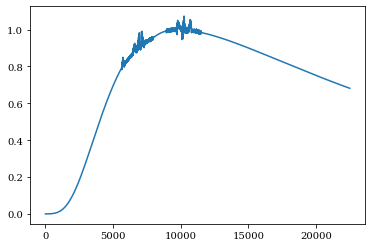

In [52]:
wavelength2 = np.append(np.linspace(1000,4280,5638),BJXpoints[1500:3800])
wavelength2 = np.append(wavelength2, np.linspace(5285,5915,1000))
wavelength2 = np.append(wavelength2,RJXpoints[800:3350])
wavelength2 = np.append(wavelength2, np.linspace(7160,12000, 11000))
bb = BlackBody(temperature=8000*u.K)
wav2 = wavelength2 * u.AA
flux = bb(wav2)
fluxN = flux/np.max(flux)
fluxAll = np.append(np.ones(5638),BMean)
fluxAll = np.append(fluxAll, np.ones(1000))
fluxAll = np.append(fluxAll,RMean)
fluxAll = np.append(fluxAll, np.ones(11000))


plt.plot(fluxN*fluxAll)

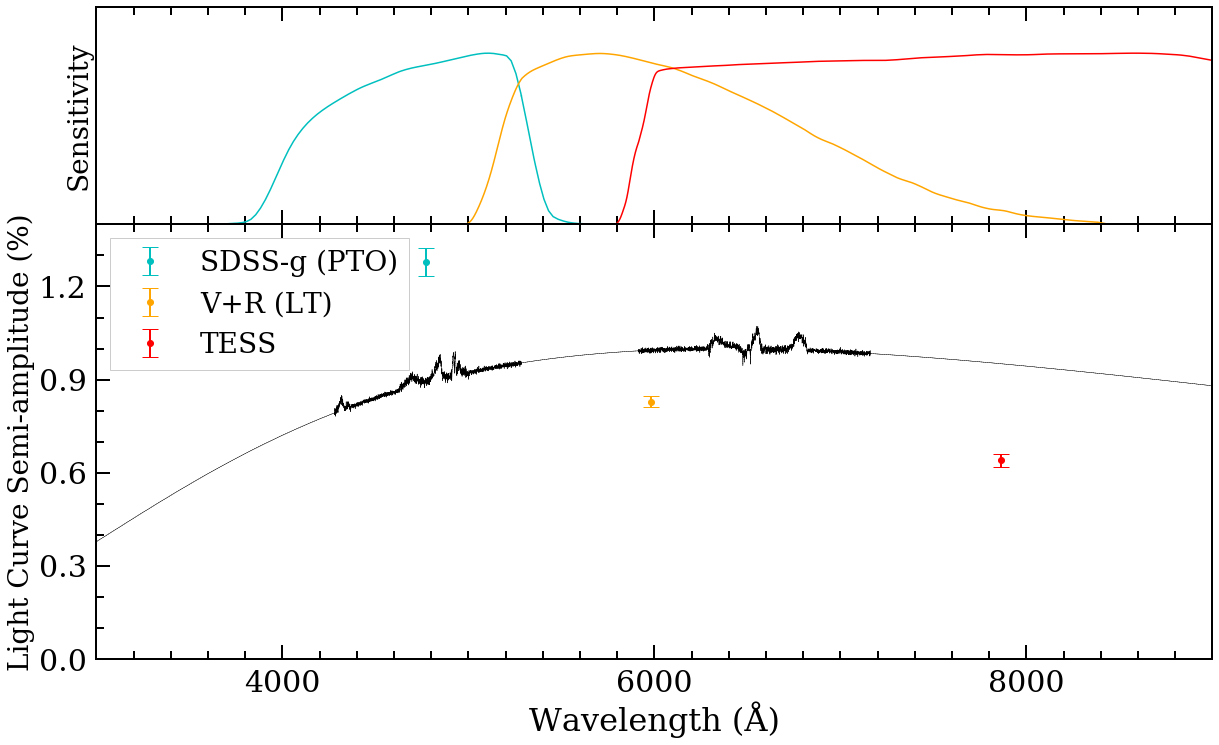

In [54]:
from matplotlib import transforms
rc('axes', linewidth=2)
fig, ax = plt.subplots(2, 1, figsize=(20,12),
                       gridspec_kw={
                           #'width_ratios': [2, 1],
                           'height_ratios': [1, 2],'hspace': 0., 'wspace': 0.0})
axs = ax[1]
########axs.plot(wav, fluxN*fluxAlln,linewidth=0.4, c='k',ls='--')
axs.plot(wav2, fluxN*fluxAll,linewidth=0.4,c='k',ls='--')
axs.plot(wav2, fluxN*fluxAll,linewidth=0.4,c='k')
#ax[0].plot(waveFUV, 0.63*sensFUV/max(sensFUV), label='FUV',c='magenta')
#ax[0].plot(waveNUV, 0.63*sensNUV/max(sensNUV), label='NUV',c='b')#
ax[0].plot(wav, 0.63*sensPTOFinal/max(sensPTOFinal), label='SDSS-g (PTO)',c='c')
#ax[0].plot(wav, 0.63*sensBrFinal/max(sensBrFinal), label='V (Brinkworth04)', c='g')
ax[0].plot(wav, 0.63*gaussian_filter(sensLT,sigma=50)/max(sensLT), label='V+R (LT)', c='orange')
ax[0].plot(wav, 0.63*gaussian_filter(sensTessFinal,sigma=20)/max(sensTessFinal), label='TESS', c='r')


#ax[0].plot(waveFUV, sensFUV, label='FUV',c='magenta')
#ax[0].plot(waveNUV, sensNUV, label='NUV',c='b')
#ax[0].plot(wav, sensPTOFinal, label='SDSS-g (PTO)',c='c')
#ax[0].plot(wav, sensBrFinal, label='V (Brinkworth04)', c='g')
#ax[0].plot(wav, gaussian_filter(sensLT,sigma=50), label='V+R (LT)', c='orange')
#ax[0].plot(wav, gaussian_filter(sensTessFinal,sigma=20), label='TESS', c='r')

axs.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
axs.tick_params(axis='y',which='major', length=14,direction="in")
axs.tick_params(axis='x',which='both', width=2,direction='in')
axs.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
ax[0].tick_params(axis='x',which='both', width=2,direction='in')
ax[0].tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax4.tick_params(labelright='on')
axs.yaxis.set_major_locator(MultipleLocator(0.3))
axs.xaxis.set_major_locator(MultipleLocator(2000))
axs.yaxis.set_minor_locator(MultipleLocator(0.1))
axs.xaxis.set_minor_locator(MultipleLocator(200))
#ax4.yaxis.set_major_locator(MultipleLocator(3))
#ax4.yaxis.set_minor_locator(MultipleLocator(1))
ax[0].yaxis.set_major_locator(MultipleLocator(0.2))
ax[0].xaxis.set_major_locator(MultipleLocator(2000))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax[0].xaxis.set_minor_locator(MultipleLocator(200))
#erg / (cm2 Hz s sr)
#ax4.set_ylabel(r'$\times$ 10$^{-5}$ erg / (cm$^2$ Hz s sr)', fontsize=28, rotation=270,position=(12,0.5))
axs.tick_params(axis='x',which='minor', length=8)
ax[0].tick_params(axis='x',which='minor', length=8)
axs.yaxis.tick_left()
#ax4.yaxis.tick_right()
axs.tick_params(axis='y',which='minor', length=8,direction='in')
##########################ax4.tick_params(axis='y',which='minor', length=8,direction='in')
ax[0].set_ylim(0,0.8)
axs.set_xlim(3000,9000)
ax[0].set_xlim(3000,9000)
ax[0].tick_params(axis='y',which='both', width=0,direction='in',pad=10)
#ax4.tick_params(axis='y',which='both', width=0,direction='in',pad=10)
axs.tick_params(labelsize=30)
#axs.yaxis.set_ticks_position('both')
axs.xaxis.set_ticks_position('both') 
ax[0].xaxis.set_ticks_position('both') 
axs.set_xlabel(r"Wavelength (Å)", fontsize=32)
axs.set_ylabel(r"Light Curve Semi-amplitude (%)", fontsize=28)
ax[0].set_ylabel("Sensitivity", fontsize=28)
#ax[0].tick_params(axis='y',which='both',labelleft=False,labelright=False)

#axs.plot([4770,5464.0, 5980,7865],[0.13, 0.02, 0.05,0.03],'rx')
ax[0].set_yticks([])
axs.errorbar([4770],[1.2787],yerr=0.04423435472098118, fmt='.', c='c', ecolor='c',  mec='c',ms=12, capsize=8,elinewidth=2,label='SDSS-g (PTO)')
#0.00829031622
#axs.plot([0,1],[0,1],c='magenta',label='FUV')
#axs.plot([0,1],[0,1],c='b',label='NUV')
ax[0].set_yticks([], minor=True)
axs.set_ylim(0,1.4)
#ax4.tick_params(labelright='on')
#ax4.yaxis.tick_right()
#ax4.yaxis.set_label_position("right")
axs.errorbar([5980],[0.829031622],yerr=0.01796689288, fmt='.', c='orange', ecolor='orange',  mec='orange',ms=12, capsize=8,elinewidth=2, label='V+R (LT)')
#axs.plot([5464],[0.2], marker='d', c='g',ms=12,label='V (Brinkworth04)',ls='')
#axs.errorbar([4779],[0.97524528], yerr=100*0.00060, fmt='d', c='magenta', ecolor='magenta',  mec='magenta',ms=12, capsize=8,elinewidth=2)
axs.errorbar([7865],[0.64],yerr=0.02, fmt='.', c='r', ecolor='r',  mec='r',ms=12, capsize=8,elinewidth=2, label='TESS')
axs.legend(prop={'size': 28}, loc='upper left',fancybox=False, framealpha=1)
bboxx = transforms.Bbox([[1.18, 0.35], [18.08, 10.6]])
plt.savefig('FiltersGD356WHT.pdf',bbox_inches=bboxx)

In [ ]:
#30

from pylab import rc
from matplotlib import transforms
rc('axes', linewidth=2)

fig, axs = plt.subplots(2, 1,
                        gridspec_kw={'hspace': 0.2, 'wspace': 0.0}, figsize=(20,20))

axs[0].plot(freq,powerPlJ04, c='k')

axs[1].errorbar(J04PhasesS,TESSStackPhotJ04S,yerr=TESSStackErrJ04S,ls='',marker='o',ms=7,ecolor='gray',c='k',elinewidth=2)
axs[1].errorbar(J04PhasesS+1,TESSStackPhotJ04S,yerr=TESSStackErrJ04S,ls='',marker='o',ms=7,ecolor='gray',c='k',elinewidth=2)

#axs[2].legend(prop={'size': 30})
axs[1].set_xlabel("Phase", fontsize=36)
axs[0].set_ylabel('Relative LS power', fontsize=36)
axs[0].set_xlabel(r"Frequency (d$^{-1}$)", fontsize=36)



axs[1].set_ylabel('Relative Flux', fontsize=36)
#ax.xaxis.set_label_coords(1.0, -0.1)
#ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
axs[0].set_xlim(0,50)
axs[1].set_xlim(-0.05,2.05)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
ax3 = plt.axes([.45, .6, .4, .25])
freqZo = np.linspace(10.4,10.6,10000)
powerPlJ04Zo = LombScargle(TESSStackTimeJ04,TESSStackPhotJ04).power(freqZo)
powerPlJ04Zo = powerPlJ04Zo/max(powerPlJ04Zo)
ax3.plot(freqZo,powerPlJ04Zo/max(powerPlJ04Zo),c='k')
setp(ax3, xticks=[10.4,10.5,10.6], yticks=[0.005,0.01,0.015])
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.minorticks_off()
#ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both', width=2,direction="in",pad=10)
ax3.tick_params(which='major', length=14,direction="in")
ax3.tick_params(labelsize=30)
#ax3.xaxis.set_major_locator(MultipleLocator(0.02))
#ax3.xaxis.set_minor_locator(MultipleLocator(0.005))
ax3.tick_params(which='minor', length=8,direction="in")
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
ax3.yaxis.set_visible(False)
#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
axs[0].xaxis.set_minor_locator(AutoMinorLocator()) #
axs[0].yaxis.set_major_locator(MultipleLocator(0.25))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.05))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(MultipleLocator(0.005))
axs[1].yaxis.set_major_locator(MultipleLocator(0.025))
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2,direction='in',pad=10)
axs[1].tick_params(which='both', width=2,direction='in',pad=10)

axs[0].tick_params(which='major', length=14)
axs[1].tick_params(which='major', length=14)

axs[0].tick_params(which='minor', length=8)
axs[1].tick_params(which='minor', length=8)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
axs[0].tick_params(labelsize=38)
axs[1].tick_params(labelsize=38)

axs[0].xaxis.set_ticks_position('both')
axs[1].xaxis.set_ticks_position('both')
#ax2.tick_params(labelsize=23)
#fig.Bbox([[0,0],[100,100]])
axs[0].xaxis.set_ticks_position('both')
axs[1].xaxis.set_ticks_position('both')
axs[0].yaxis.set_ticks_position('both')
axs[1].yaxis.set_ticks_position('both')


bboxx = transforms.Bbox([[-0.16, 1.38], [18.32, 17.65]])
plt.savefig('J0412Phot.pdf',bbox_inches=bboxx) 
plt.show()

In [48]:
from scipy.integrate import simps
from scipy.integrate import trapz

In [49]:
dummyBlackBody = fluxN
actualFlux = fluxN*fluxAll*sensBrFinal
actualFlux = np.nan_to_num(actualFlux)
areaActualBr = simps(actualFlux, x=wav)
areaDummyBr = simps(fluxN*sensBrFinal, x=wav)
print(areaActualBr, areaDummyBr)
#emission area = difference
#area varries by 

828.1432235363964 827.2565803735513


In [50]:
dummyBlackBody = fluxN
actualFlux = fluxN*fluxAll*sensTessFinal
actualFlux = np.nan_to_num(actualFlux)
areaActualTESS = simps(actualFlux, x=wav)
areaDummyTESS = simps(fluxN*sensTessFinal, x=wav)
print(areaActualTESS, areaDummyTESS)

3641.455829781875 3635.0783586383095


In [51]:
dummyBlackBody = fluxN
actualFlux = fluxN*fluxAll*sensLT
actualFlux = np.nan_to_num(actualFlux)
areaActualLT = simps(actualFlux, x=wav)
areaDummyLT = simps(fluxN*sensLT, x=wav)
print(areaActualLT, areaDummyLT)

1281.9238155250364 1278.4510752490569


In [49]:
len(sensPTO)

89

In [52]:
dummyBlackBody = fluxN
actualFlux = fluxN*fluxAll*sensPTOFinal
actualFlux = np.nan_to_num(actualFlux)
areaActualPTO = simps(actualFlux, x=wav)
areaDummyPTO = simps(fluxN*sensPTOFinal, x=wav)
print(areaActualPTO, areaDummyPTO)

366.59714942954156 364.0857562088477


In [53]:
dummyBlackBody = fluxN
actualFlux = fluxN*fluxAll*sensZTFFinal
actualFlux = np.nan_to_num(actualFlux)
areaActualZTF = simps(actualFlux, x=wav)
areaDummyZTF = simps(fluxN*sensZTFFinal, x=wav)
print(areaActualZTF, areaDummyZTF)

1070.507443437667 1063.6529006276862


In [51]:
LTArea = ((areaActualLT - areaDummyLT)/areaDummyLT)*100
print(LTArea)

0.27163654074935756


In [52]:
TESSArea = ((areaActualTESS-areaDummyTESS)/areaDummyTESS)*100
print(TESSArea)

0.1754424668290872


In [53]:
BrArea = ((areaActualBr-areaDummyBr)/areaActualBr)*100
print(BrArea)

0.10706398816606486


In [54]:
PTOArea = ((areaActualPTO-areaDummyPTO)/areaActualPTO)*100
print(PTOArea)

0.6850553051494778


In [54]:
ZTFArea = ((areaActualZTF-areaDummyZTF)/areaActualZTF)*100
print(ZTFArea)

0.6403078140184747


In [55]:
0.6403078140184747*0.19

0.12165848466351019

In [55]:
LTArea/BrArea #LT - BR

2.537141997064666

In [56]:
0.81/0.2 

4.05

In [57]:
LTArea/TESSArea # LT - TESS

1.548294125469524

In [58]:
0.81/0.646

1.2538699690402477

In [59]:
TESSArea / BrArea# TESS - BR

1.6386692653085353

In [60]:
0.646 / 0.2

3.23

In [61]:
print(1.279/0.646)# PTO - TESS phot
print(PTOArea / TESSArea)# PTO - TESS spec
print(1.279/0.81)# PTO - LT phot
print(PTOArea/LTArea)# PTO - LT spec
print('======')
print(1.279/0.2)# PTO - Brink phot
print(PTOArea/BrArea)# PTO - Brink spec

1.9798761609907118
3.9047290974131474
1.5790123456790122
2.5219556369685434
6.395
6.398559561286862


In [ ]:
#Brinkworth +-0.2%
#TESS +-0.646%
#LT +- 0.81%
#PTO +-1.279%

In [62]:
RBrink = areaActualBr/areaDummyBr
RTESS = areaActualTESS/areaDummyTESS
RLT = areaActualLT/areaDummyLT
RPTO = areaActualPTO/areaDummyPTO

In [63]:
print(RBrink,RTESS,RLT,RPTO)

1.0010717873799744 1.0017544246682908 1.0027163654074935 1.0068978068432133


In [64]:
f1Brink = RBrink - 1
f1TESS = RTESS - 1
f1LT = RLT - 1
f1PTO = RPTO - 1

In [65]:
print(f1Brink,f1TESS,f1LT,f1PTO)

0.001071787379974376 0.0017544246682907882 0.0027163654074935373 0.006897806843213283


In [66]:
f2 = 0.191405439

In [67]:
AWBrink = f1Brink * f2
AWTESS = f1TESS * f2
AWLT = f1LT * f2
AWPTO = f1PTO * f2

In [68]:
print(AWBrink,AWTESS,AWLT,AWPTO)

0.00020514593397865527 0.00033580642382662773 0.0005199271133057144 0.0013202777469624428


In [69]:
print(0.2/100,0.646/100,0.81/100,1.279/100)
#Brinkworth +-0.2%
#TESS +-0.646%
#LT +- 0.81%
#PTO +-1.279%

0.002 0.0064600000000000005 0.008100000000000001 0.01279


|  Facility |    JKT   |    TESS    |   LT   |   PTO  |
|:---------:|:--------:|:----------:|:------:|:------:|
|   filter  | V Harris | 600-1000nm |   V+R  | SDSS-g |
|     f1    |  0.0011  |   0.0018   | 0.0027 | 0.0069 |
|     f2    |  0.1914  |   0.1914   | 0.1914 | 0.1914 |
|     AW    |  0.0002  |   0.0003   | 0.0005 | 0.0013 |
|     F0    |  0.0020  |   0.0065   | 0.0081 | 0.0128 |

In [103]:
actualFlux1 = np.nan_to_num(sensPTOFinal*fluxN*fluxAll*wav/max(sensPTOFinal*fluxN*fluxAll))
actualFlux2 = np.nan_to_num(sensPTOFinal*fluxN*fluxAll/max(sensPTOFinal*fluxN*fluxAll))
EffWavPTO1 = simps(actualFlux1, wav)
EffWavPTO2 = simps(actualFlux2, wav)
EffWavPTO = EffWavPTO1/EffWavPTO2
print(EffWavPTO)

4748.960107753965


In [104]:
actualFlux1 = np.nan_to_num(sensTessFinal*fluxN*fluxAll*wav/max(sensTessFinal*fluxN*fluxAll))
actualFlux2 = np.nan_to_num(sensTessFinal*fluxN*fluxAll/max(sensTessFinal*fluxN*fluxAll))
EffWavTESS1 = simps(actualFlux1, wav)
EffWavTESS2 = simps(actualFlux2, wav)
EffWavTESS = EffWavTESS1/EffWavTESS2
print(EffWavTESS)

7895.929242275233


In [105]:
actualFlux1 = np.nan_to_num(sensLT*fluxN*fluxAll*wav/max(sensLT*fluxN*fluxAll))
actualFlux2 = np.nan_to_num(sensLT*fluxN*fluxAll/max(sensLT*fluxN*fluxAll))
EffWavLT1 = simps(actualFlux1, wav)
EffWavLT2 = simps(actualFlux2, wav)
EffWavLT = EffWavLT1/EffWavLT2
print(EffWavLT)

6169.59026889979


In [106]:
actualFlux1 = np.nan_to_num(sensBrFinal*fluxN*fluxAll*wav/max(sensBrFinal*fluxN*fluxAll))
actualFlux2 = np.nan_to_num(sensBrFinal*fluxN*fluxAll/max(sensBrFinal*fluxN*fluxAll))
EffWavBr1 = simps(actualFlux1, wav)
EffWavBr2 = simps(actualFlux2, wav)
EffWavBr = EffWavBr1/EffWavBr2
print(EffWavBr)


5507.86417588121
